In [1]:
### imports
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import  validation_curve

from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
### data
X,y = datasets.load_diabetes(return_X_y=True)
print("X is:")
print(X.shape)
print("y is:")
print(y.shape)

X is:
(442, 10)
y is:
(442,)


In [3]:
### xg boost model

xgbmod = XGBRegressor(booster='gbtree',objective='reg:squarederror',
   max_depth=6, learning_rate=0.1, n_estimators=100, random_state=2, n_jobs=-1)

In [4]:
### cross-val

cvres = cross_val_score(xgbmod,X,y,scoring='neg_mean_squared_error',cv=5)

# tranform to rmse
rmse = np.sqrt(np.mean(-cvres)) 
print('the rmse for k=40 based on 5-fold is:', np.round(rmse,3))

the rmse for k=40 based on 5-fold is: 63.15


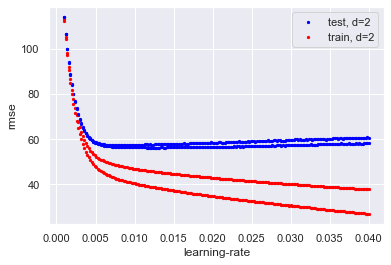

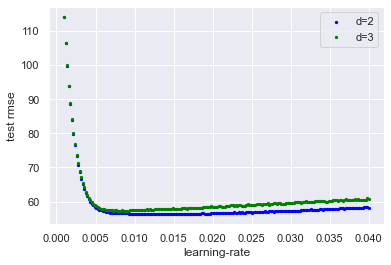

In [5]:
###  cross validation on a grid of k values using sklearn validation_curve function

## d=2
xgbmod = XGBRegressor(booster='gbtree',objective='reg:squarederror',
   max_depth=2, learning_rate=0.1, n_estimators=500, random_state=2, n_jobs=-1)

# do cv at every value of k in kvec
lrv = np.linspace(start=.001,stop=.04,num=200)
trainS, testS = validation_curve(xgbmod,X,y,'learning_rate',lrv,cv=10,scoring='neg_mean_squared_error')

# transform neg_mean_squared_error to rmse
trrmse = np.sqrt(-trainS.mean(axis=1))
termse = np.sqrt(-testS.mean(axis=1))

#plot in and out of sample rmse
plt.scatter(lrv,termse,c='blue',s=5)
plt.scatter(lrv,trrmse,c='red',s=5)
plt.xlabel("learning-rate"); plt.ylabel("rmse")
plt.legend(['test, d=2','train, d=2'])
#plt.show()
plt.savefig("xgb_d2_train-test.pdf")

## d=3
xgbmod1 = XGBRegressor(booster='gbtree',objective='reg:squarederror',
   max_depth=3, learning_rate=0.1, n_estimators=500, random_state=2, n_jobs=-1)

# do cv at every value of k in kvec
lrv = np.linspace(start=.001,stop=.04,num=200)
trainS1, testS1 = validation_curve(xgbmod1,X,y,'learning_rate',lrv,cv=10,scoring='neg_mean_squared_error')

# transform neg_mean_squared_error to rmse
trrmse1 = np.sqrt(-trainS1.mean(axis=1))
termse1 = np.sqrt(-testS1.mean(axis=1))

#plot in and out of sample rmse
plt.scatter(lrv,termse1,c='blue',s=5)
plt.scatter(lrv,trrmse1,c='red',s=5)
plt.show()

## plot d=2 and 3
plt.scatter(lrv,termse,c='blue',s=5)
plt.scatter(lrv,termse1,c='green',s=5)
plt.xlabel("learning-rate"); plt.ylabel("test rmse")
plt.legend(['d=2','d=3'])
#plt.plot(lrv,trrmse,c='red',s=5)
#plt.plot(lrv,trrmse1,c='orange',s=5)
#plt.show()
plt.savefig("xgb_d23.pdf")